**Student_Performance_Predictor with Decision tree**


In [1296]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [1297]:
dataMat = pd.read_csv('student/student-mat.csv', sep=';')
dataPor = pd.read_csv('student/student-por.csv', sep=';')

In [1300]:
data = pd.concat([dataMat, dataPor])

In [1301]:
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


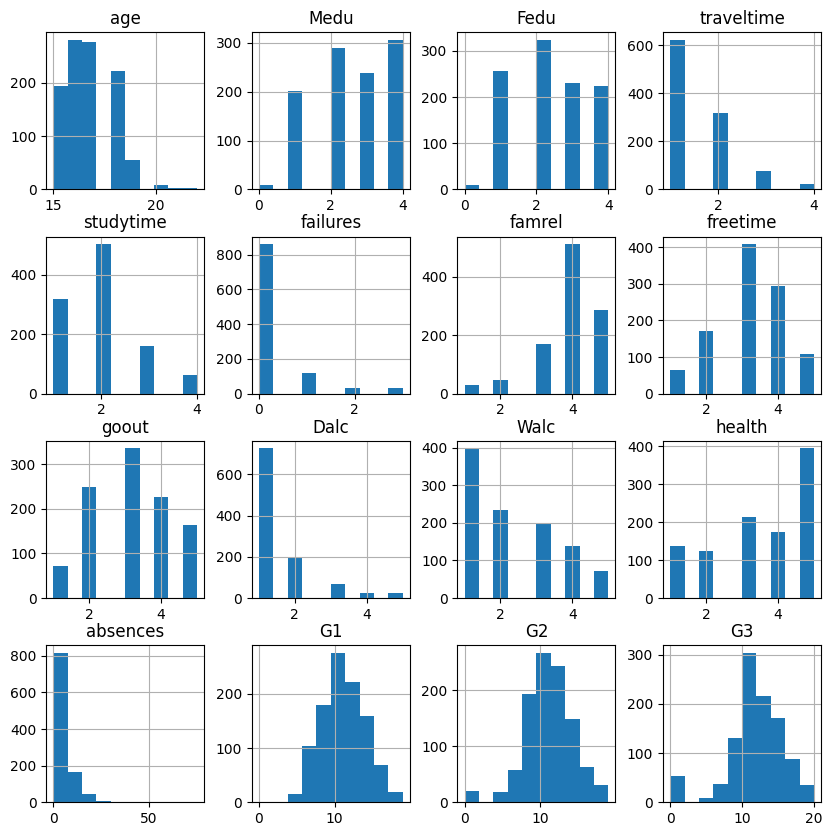

In [1302]:
data.hist(figsize = (10,10))
plt.show()

In [1303]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [1304]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [1305]:
cleanup_nums = {
    "yes": 1, "no": 0, 
    "F": 1, "M": 0, 
    "GP": 1, "MS": 0, 
    "R": 1, "U": 0, 
    "GT3": 1, "LE3": 0, 
    "A": 1, "T": 0
}

data.replace(cleanup_nums, inplace=True)

data = pd.get_dummies(data, columns=["Mjob", "Fjob", "reason", "guardian"])


C:\Users\Stacy1KelvinNotebook\AppData\Local\Temp\ipykernel_3028\4031357085.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(cleanup_nums, inplace=True)


**Regression**

In [1306]:
X = data.drop(columns=['G3'])
y = data['G3'] 

In [1307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [1308]:
dt_regressor = DecisionTreeRegressor(max_depth=5,ccp_alpha=0.01)

dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.01, max_depth=5)

In [1309]:
y_pred = dt_regressor.predict(X_test)


In [1310]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared Score (R2)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R2): {r2}")


Mean Absolute Error (MAE): 0.9559254257324395
Mean Squared Error (MSE): 3.274178611712365
Root Mean Squared Error (RMSE): 1.8094691519095774
R-squared Score (R2): 0.7836874905696259


In [1311]:
dt_regressor.feature_importances_

array([0.00000000e+00, 6.76121008e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.67104126e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.09337125e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.37846731e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.27034529e-02, 5.38693512e-03, 9.17754019e-01,
       8.45297606e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [1312]:
feature_importances = pd.DataFrame(dt_regressor.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
G2,0.917754
absences,0.052703
goout,0.013785
sex,0.006761
G1,0.005387
Medu,0.001671
paid,0.001093
Mjob_at_home,0.000845
Pstatus,0.000000
famsize,0.000000


<Axes: >

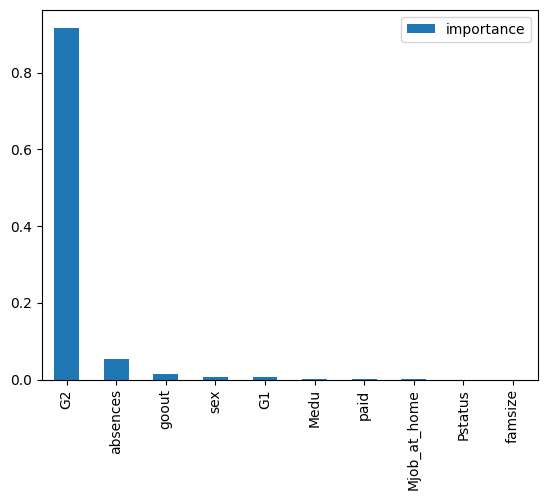

In [1313]:
feature_importances.head(10).plot(kind='bar')

**With Cross Validation**

In [1314]:
from sklearn.model_selection import cross_val_predict

# Cross-validation prediction
y_pred_cv = cross_val_predict(dt_regressor, X_train, y_train, cv=10)

# Calculate metrics

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_pred_cv)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_pred_cv)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared Score (R2)
r2 = r2_score(y_train, y_pred_cv)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R2): {r2}")


Mean Absolute Error (MAE): 0.9756392603104355
Mean Squared Error (MSE): 2.911071264734421
Root Mean Squared Error (RMSE): 1.7061861752852239
R-squared Score (R2): 0.8019236122695955


In [1315]:
# Get feature importances
importances = dt_regressor.feature_importances_

# Define threshold (adjust based on observation)
threshold = 0.005

# Select important feature indices
important_indices = np.where(importances >= threshold)[0]

# Select only important features
X_train_reduced = X_train.iloc[:, important_indices]

# Perform cross-validation on the reduced dataset
y_pred_cv = cross_val_predict(dt_regressor, X_train, y_train, cv=10)
# Calculate metrics

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_pred_cv)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_pred_cv)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared Score (R2)
r2 = r2_score(y_train, y_pred_cv)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R2): {r2}")


Mean Absolute Error (MAE): 0.9922173436719879
Mean Squared Error (MSE): 2.9990338523353457
Root Mean Squared Error (RMSE): 1.7317718823030201
R-squared Score (R2): 0.7959384233054909


**Classification**

In [1316]:
# Function to categorize G3 into classes
def categorize_grade(g):
    if g >= 10:
        return 1
    else:
        return 0

data['G3_class'] = data['G3'].apply(categorize_grade)

print(data[['G3', 'G3_class']])


     G3  G3_class
0     6         0
1     6         0
2    10         1
3    15         1
4    10         1
..   ..       ...
644  10         1
645  16         1
646   9         0
647  10         1
648  11         1

[1044 rows x 2 columns]


In [1317]:
X = data.drop(columns=['G3', 'G3_class'])
y = data['G3_class']

In [1318]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [1319]:
X_train.dtypes

school               int64
sex                  int64
age                  int64
address              int64
famsize              int64
Pstatus              int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
schoolsup            int64
famsup               int64
paid                 int64
activities           int64
nursery              int64
higher               int64
internet             int64
romantic             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
G1                   int64
G2                   int64
Mjob_at_home          bool
Mjob_health           bool
Mjob_other            bool
Mjob_services         bool
Mjob_teacher          bool
Fjob_at_home          bool
Fjob_health           bool
Fjob_other            bool
Fjob_services         bool
F

In [1320]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [1321]:
y_pred = clf.predict(X_test)

In [1322]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.868421052631579

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.74       105
           1       0.91      0.91      0.91       313

    accuracy                           0.87       418
   macro avg       0.83      0.82      0.82       418
weighted avg       0.87      0.87      0.87       418



In [1323]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [1324]:
feature_names = X.columns
feature_names

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

In [1325]:
clf.feature_importances_

array([0.01421654, 0.004998  , 0.        , 0.        , 0.        ,
       0.        , 0.00422908, 0.00710243, 0.00318713, 0.04209379,
       0.00940801, 0.        , 0.        , 0.00543261, 0.00666401,
       0.00722056, 0.        , 0.01199521, 0.        , 0.00357   ,
       0.00749701, 0.        , 0.02247829, 0.0245781 , 0.        ,
       0.04414639, 0.05249643, 0.68334506, 0.        , 0.00289739,
       0.        , 0.        , 0.01768991, 0.        , 0.        ,
       0.01184712, 0.00790893, 0.        , 0.004998  , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [1326]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = feature_names,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
G2,0.683345
G1,0.052496
absences,0.044146
studytime,0.042094
Walc,0.024578
Dalc,0.022478
Mjob_teacher,0.017690
school,0.014217
internet,0.011995
Fjob_other,0.011847


In [1327]:
features=list(feature_importances[feature_importances['importance'] > 0].index) 
features

['G2',
 'G1',
 'absences',
 'studytime',
 'Walc',
 'Dalc',
 'Mjob_teacher',
 'school',
 'internet',
 'Fjob_other',
 'failures',
 'Fjob_services',
 'freetime',
 'nursery',
 'Fedu',
 'activities',
 'paid',
 'sex',
 'reason_course',
 'Medu',
 'famrel',
 'traveltime',
 'Mjob_health']

<Axes: >

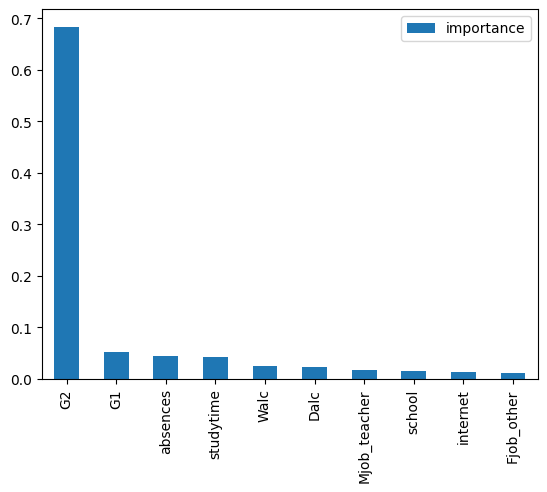

In [1328]:
feature_importances.head(10).plot(kind='bar')

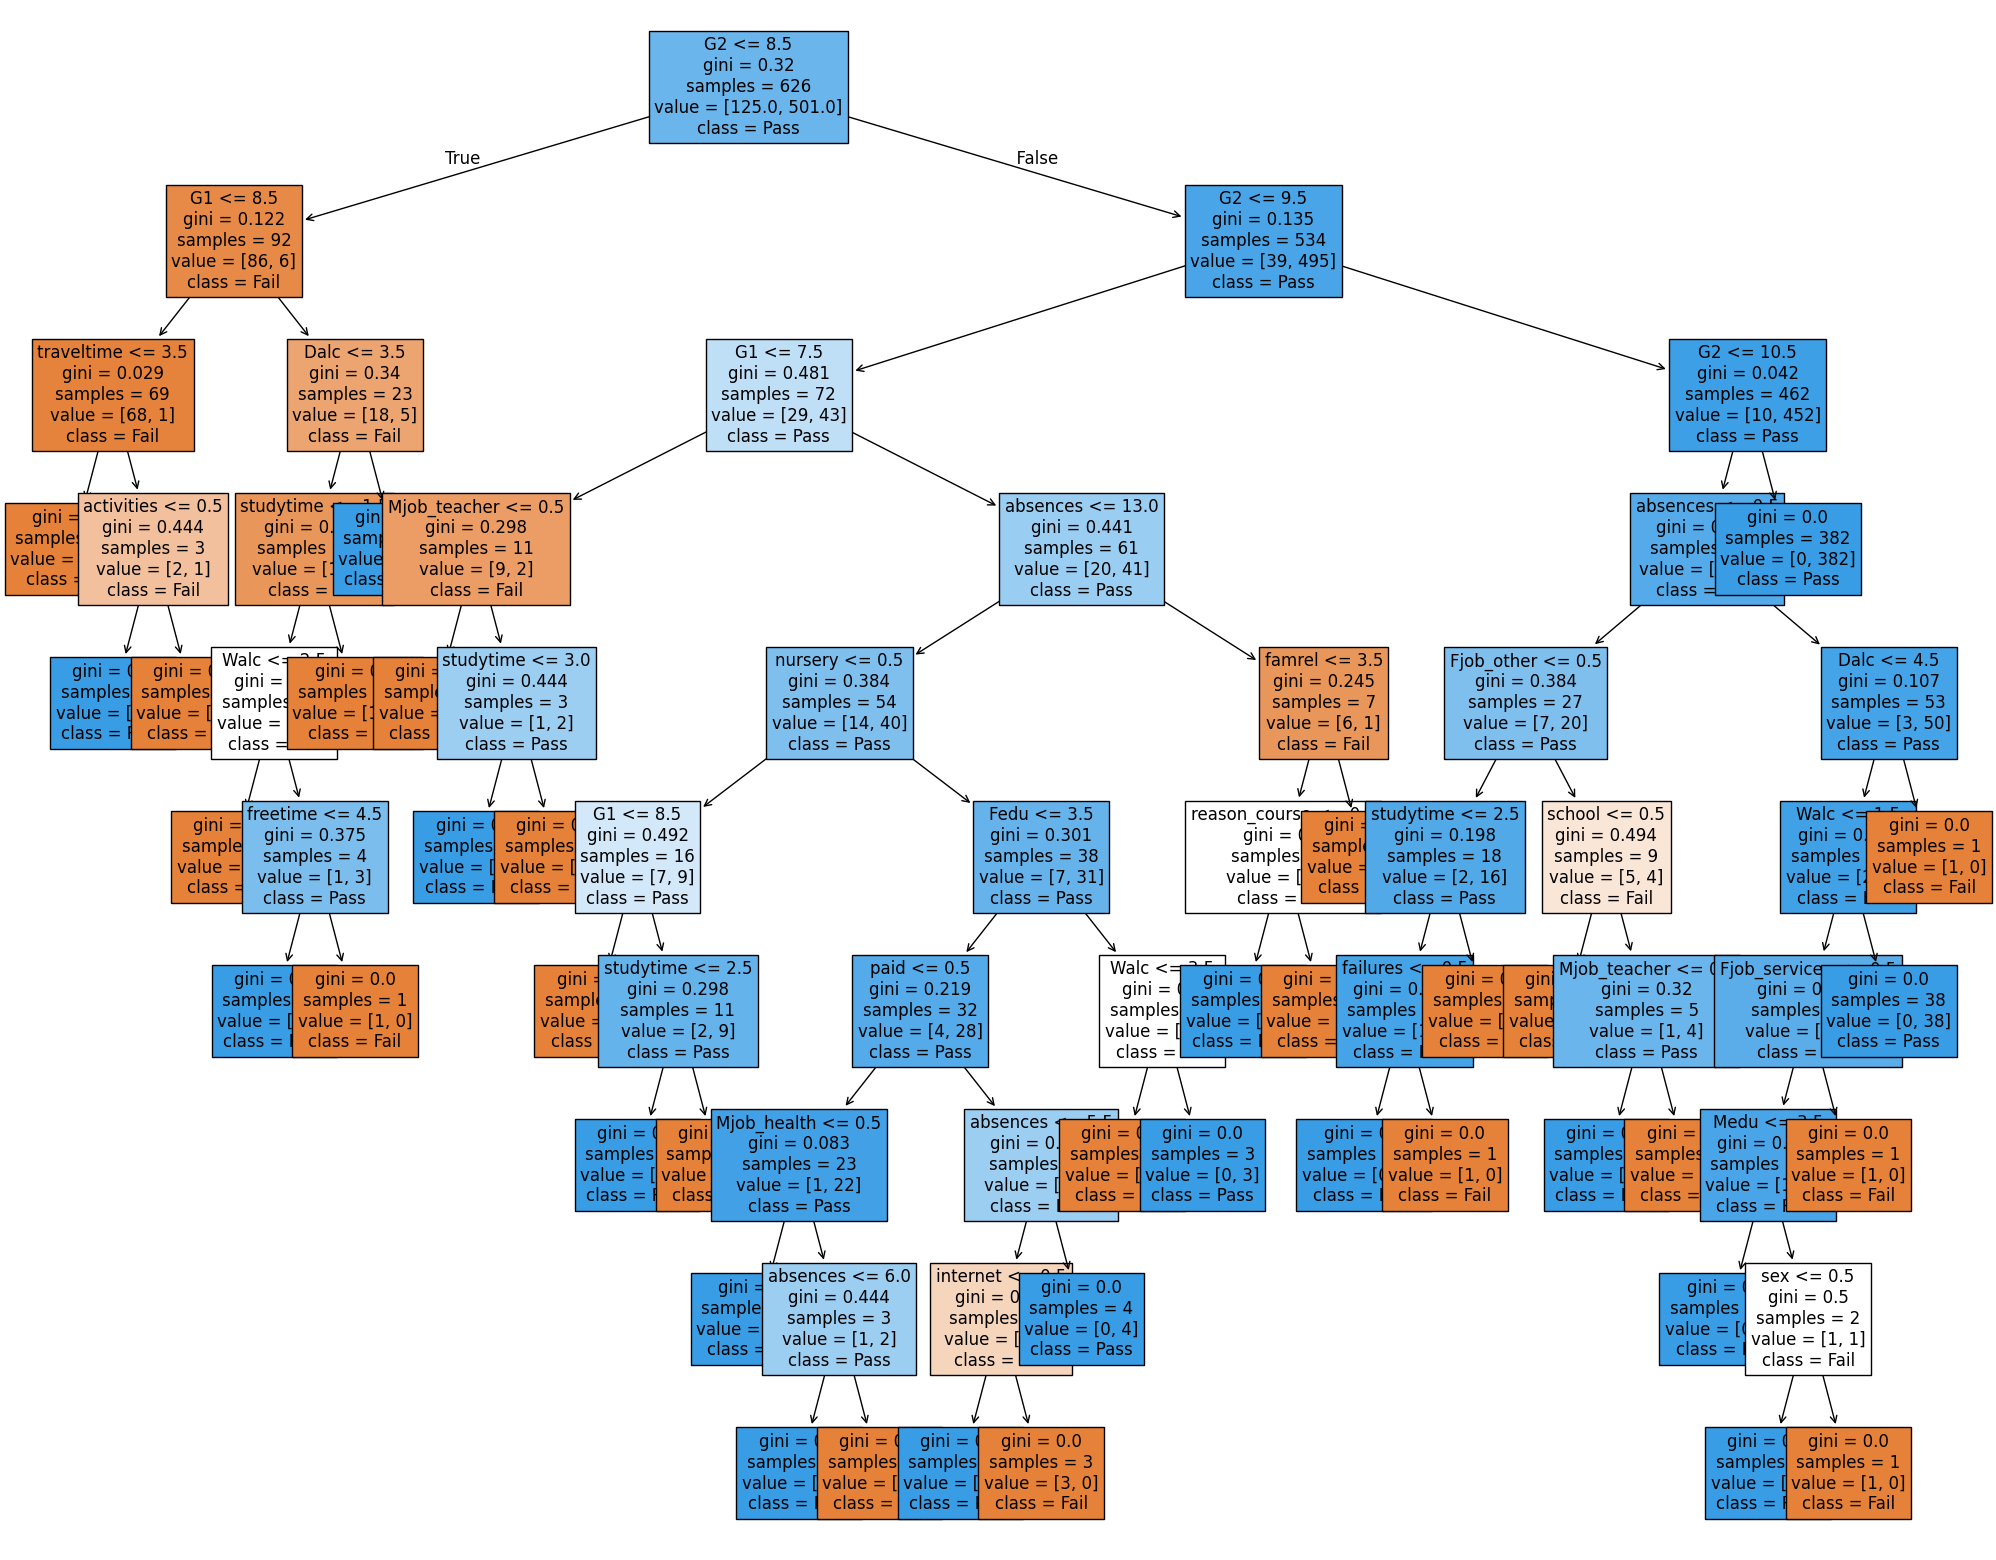

In [1329]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names=['Fail', 'Pass'],
                   filled=True,
                   fontsize=12)

In [1330]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the full dataset
cv_scores_full = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

print(f"Mean Accuracy with All Features: {cv_scores_full.mean():.4f}")


Mean Accuracy with All Features: 0.9106


In [1331]:
# Get feature importances
importances = clf.feature_importances_

# Define threshold (adjust based on observation)
threshold = 0.015  

# Select important feature indices
important_indices = np.where(importances >= threshold)[0]

# Select only important features
X_train_reduced = X_train.iloc[:, important_indices]

# Perform cross-validation on the reduced dataset
cv_scores_reduced = cross_val_score(clf, X_train_reduced, y_train, cv=5, scoring='accuracy')

print(f"Mean Accuracy with Reduced Features: {cv_scores_reduced.mean():.4f}")


Mean Accuracy with Reduced Features: 0.9201


In [1332]:
param_grid = {
    'max_depth': [3, 5, 10, None], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

clf = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
clf.fit(X_train, y_train)

print("Best Parameters:", clf.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [1333]:
best_clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_leaf=4,
    min_samples_split=2,
    random_state=42
)


best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)

print("Optimized Accuracy:", accuracy_score(y_test, y_pred))
print("Optimized Classification Report:\n", classification_report(y_test, y_pred))


Optimized Accuracy: 0.8995215311004785
Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78       105
           1       0.90      0.97      0.94       313

    accuracy                           0.90       418
   macro avg       0.89      0.83      0.86       418
weighted avg       0.90      0.90      0.90       418



In [1334]:
feature_names = X.columns
feature_names

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

In [1335]:
best_clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03635907, 0.96364093, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [1336]:
feature_importances = pd.DataFrame(best_clf.feature_importances_,
                                   index = feature_names,
                                   columns=['importance']).sort_values('importance', ascending=False)